In [1]:
import numpy as np
import pandas as pd
train_raw = pd.read_csv('../titanic/train.csv')
#Exploration of data
import seaborn as sns
import matplotlib.pyplot as plt

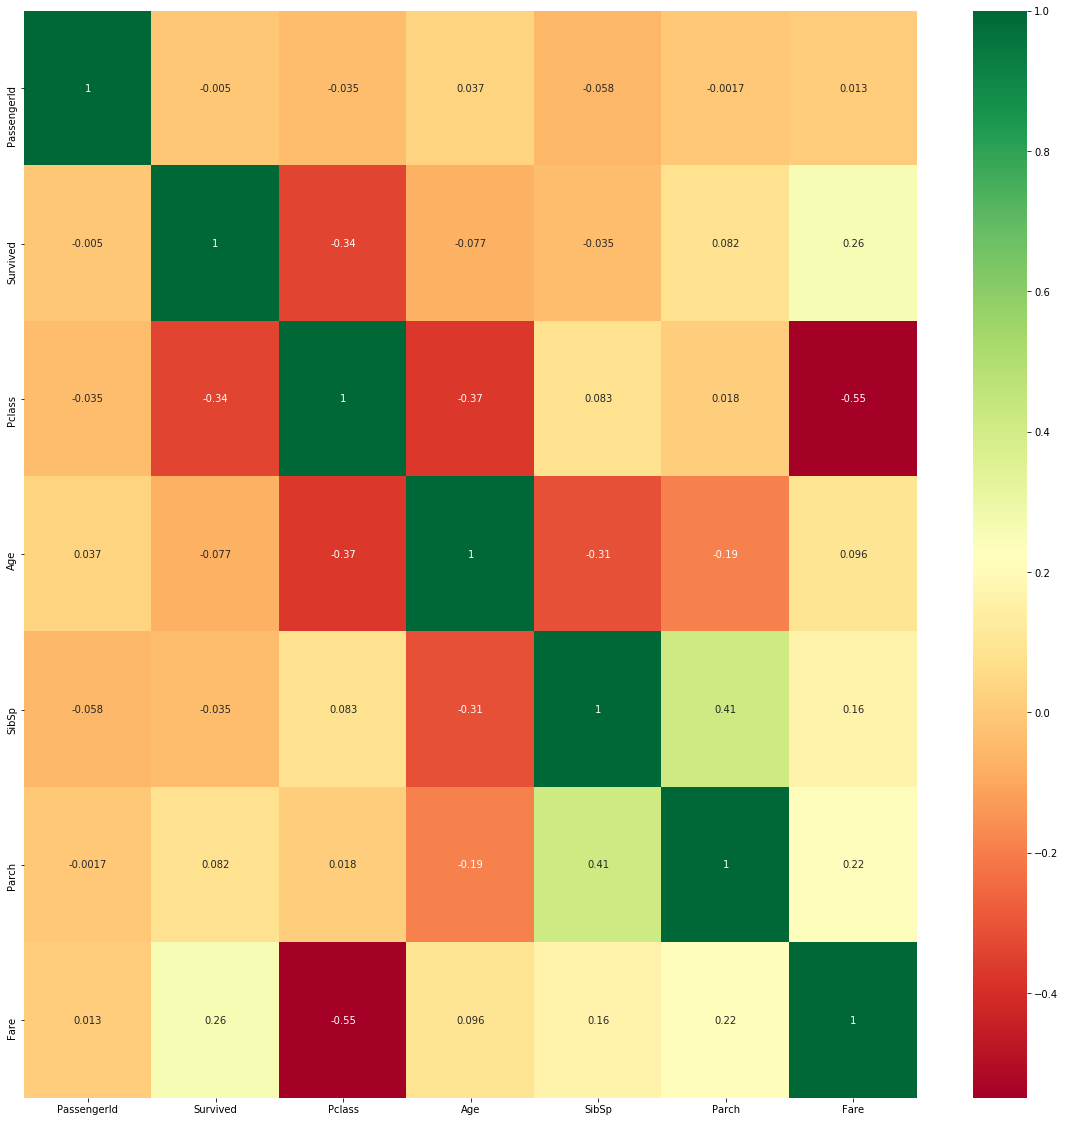

In [2]:
corrmat = train_raw.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_raw[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [3]:
#Performing same data transformations
from sklearn import preprocessing
#train_raw.drop(columns=['PassengerId'],inplace=True)
train_raw['Cabin'] = train_raw['Cabin'].fillna(0)
train_raw['Cabin'] = train_raw['Cabin'].where(train_raw['Cabin']==0,1)
train_raw.drop(columns=['Name','Ticket'],inplace=True)
train_raw = pd.concat([train_raw,pd.get_dummies(train_raw['Sex'],prefix='Sex')],axis = 1)
train_raw.drop(columns='Sex',inplace=True)
train_raw = pd.concat([train_raw,pd.get_dummies(train_raw['Embarked'],prefix='Embarked')],axis = 1)
train_raw.drop(columns=['Embarked'],inplace=True)
train_raw['Fare'] = train_raw['Fare'].fillna(train_raw['Fare'].median())
fare_col = train_raw.Fare.values
fare_col = fare_col.reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
fare_col_scaled = min_max_scaler.fit_transform(fare_col)
train_raw['fare_col_scaled_col'] = fare_col_scaled
train_raw.drop(columns=['Fare'],inplace=True)

In [4]:
train_raw.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col
0,1,0,3,22.0,1,0,0,0,1,0,0,1,0.014151
1,2,1,1,38.0,1,0,1,1,0,1,0,0,0.139136
2,3,1,3,26.0,0,0,0,1,0,0,0,1,0.015469
3,4,1,1,35.0,1,0,1,1,0,0,0,1,0.103644
4,5,0,3,35.0,0,0,0,0,1,0,0,1,0.015713


In [5]:
nan_df = train_raw[train_raw['Age'].isna()]

In [6]:
nan_df[nan_df.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col
5,6,0,3,NaN,0,0,0,0,1,0,1,0,0.016510
17,18,1,2,NaN,0,0,0,0,1,0,0,1,0.025374
19,20,1,3,NaN,0,0,0,1,0,1,0,0,0.014102
26,27,0,3,NaN,0,0,0,0,1,1,0,0,0.014102
28,29,1,3,NaN,0,0,0,1,0,0,1,0,0.015379
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,NaN,0,0,0,0,1,1,0,0,0.014110
863,864,0,3,NaN,8,2,0,1,0,0,0,1,0.135753
868,869,0,3,NaN,0,0,0,0,1,0,0,1,0.018543
878,879,0,3,NaN,0,0,0,0,1,0,0,1,0.015412


In [7]:
non_nan_df = train_raw[train_raw['Age'].notna()]

In [8]:
non_nan_df[non_nan_df.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col


In [9]:
nan_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col
5,6,0,3,NaN,0,0,0,0,1,0,1,0,0.016510
17,18,1,2,NaN,0,0,0,0,1,0,0,1,0.025374
19,20,1,3,NaN,0,0,0,1,0,1,0,0,0.014102
26,27,0,3,NaN,0,0,0,0,1,1,0,0,0.014102
28,29,1,3,NaN,0,0,0,1,0,0,1,0,0.015379


In [10]:
# use Ann to predict ages
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks.callbacks import ReduceLROnPlateau
def build_neural_net(optimizer,initializer,layer_1_activation,layer_2_activation):
    classifier= Sequential()
    classifier.add(Dense(units=8,kernel_initializer = initializer,activation=layer_1_activation,input_dim=11))
    classifier.add(Dropout(rate=0.2))
    classifier.add(Dense(units=4,kernel_initializer = initializer,activation=layer_2_activation))
    #classifier.add(Dropout(rate=0.2))
    classifier.add(Dense(units=1,kernel_initializer = initializer,activation='sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

Using TensorFlow backend.


In [11]:
classifier = build_neural_net('adam','uniform','relu','relu')

In [12]:
#build data to be fed to ANN
x_col = [col for col in non_nan_df.columns if col!= 'Age']
y_col = ['Age']
x_col = [items for items in x_col if items!='PassengerId']
x_col = [items for items in x_col if items!='Survived']
#x_col = [items for items in x_col if items!='SibSp']

In [13]:
training_imputation_x = non_nan_df[x_col]
training_imputation_y = non_nan_df[y_col]

In [14]:
training_imputation_x.head()

,Pclass,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col
0,3,1,0,0,0,1,0,0,1,0.014151
1,1,1,0,1,1,0,1,0,0,0.139136
2,3,0,0,0,1,0,0,0,1,0.015469
3,1,1,0,1,1,0,0,0,1,0.103644
4,3,0,0,0,0,1,0,0,1,0.015713


In [15]:
training_imputation_y.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [16]:
from sklearn.linear_model import Lasso

In [17]:
training_imputation_y[training_imputation_y.isna().any(axis=1)]

,Age


In [18]:
# fir the regression model
model = Lasso(alpha=0.1)
model_fit = model.fit(training_imputation_x,training_imputation_y)

In [19]:
nan_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col
5,6,0,3,NaN,0,0,0,0,1,0,1,0,0.016510
17,18,1,2,NaN,0,0,0,0,1,0,0,1,0.025374
19,20,1,3,NaN,0,0,0,1,0,1,0,0,0.014102
26,27,0,3,NaN,0,0,0,0,1,1,0,0,0.014102
28,29,1,3,NaN,0,0,0,1,0,0,1,0,0.015379


In [20]:
x_test_laso = nan_df[x_col]
y_predictions_lasso = model.predict(x_test_laso)

In [21]:
y_predictions_lasso
nan_df['predicted_age'] = y_predictions_lasso

C:\Users\amakkad\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
nan_df.head(10)
nan_df.drop(columns=['Age'],inplace=True)

C:\Users\amakkad\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
nan_df['Age'] = y_predictions_lasso
nan_df.drop(columns=['predicted_age'],inplace=True)

C:\Users\amakkad\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
nan_df.head(10)

,PassengerId,Survived,Pclass,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col,Age
5,6,0,3,0,0,0,0,1,0,1,0,0.016510,28.620065
17,18,1,2,0,0,0,0,1,0,0,1,0.025374,34.967788
19,20,1,3,0,0,0,1,0,1,0,0,0.014102,23.831941
26,27,0,3,0,0,0,0,1,1,0,0,0.014102,26.619761
28,29,1,3,0,0,0,1,0,0,1,0,0.015379,25.832245
29,30,0,3,0,0,0,0,1,0,0,1,0.015412,28.529624
31,32,1,1,1,0,1,1,0,1,0,0,0.285990,32.835182
32,33,1,3,0,0,0,1,0,0,1,0,0.015127,25.832245
36,37,1,3,0,0,0,0,1,1,0,0,0.014110,26.619761
42,43,0,3,0,0,0,0,1,1,0,0,0.015412,26.619761


In [25]:
final_data = pd.concat([nan_df,non_nan_df])

In [26]:
final_data.head(10)

,PassengerId,Survived,Pclass,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col,Age
5,6,0,3,0,0,0,0,1,0,1,0,0.016510,28.620065
17,18,1,2,0,0,0,0,1,0,0,1,0.025374,34.967788
19,20,1,3,0,0,0,1,0,1,0,0,0.014102,23.831941
26,27,0,3,0,0,0,0,1,1,0,0,0.014102,26.619761
28,29,1,3,0,0,0,1,0,0,1,0,0.015379,25.832245
29,30,0,3,0,0,0,0,1,0,0,1,0.015412,28.529624
31,32,1,1,1,0,1,1,0,1,0,0,0.285990,32.835182
32,33,1,3,0,0,0,1,0,0,1,0,0.015127,25.832245
36,37,1,3,0,0,0,0,1,1,0,0,0.014110,26.619761
42,43,0,3,0,0,0,0,1,1,0,0,0.015412,26.619761


In [27]:
final_data[final_data.isna().any(axis=1)]

,PassengerId,Survived,Pclass,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col,Age


In [28]:
age_col = final_data.Age.values
age_col = age_col.reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
age_col_scaled = min_max_scaler.fit_transform(age_col)
final_data['age_col_scaled_col'] = age_col_scaled
final_data.drop(columns=['Age'],inplace=True)

In [29]:
from sklearn.model_selection import train_test_split
train_col_x = [ col for col in final_data.columns if col!='Survived']
train_col_x = [ col for col in train_col_x if col!='PassengerId']
#train_col_x = [items for items in train_col_x if items!='SibSp']
train_col_y = ['Survived']

In [30]:
X = final_data[train_col_x]
Y = final_data[train_col_y]

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [33]:
model3 = RandomForestClassifier(max_depth=12, random_state=0,n_estimators=140)

In [34]:
# use Ann to predict ages
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks.callbacks import ReduceLROnPlateau
def build_neural_net_2(optimizer,initializer,layer_1_activation,layer_2_activation):
    classifier= Sequential()
    classifier.add(Dense(units=8,kernel_initializer = initializer,activation=layer_1_activation,input_dim=11))
    classifier.add(Dropout(rate=0.2))
    classifier.add(Dense(units=4,kernel_initializer = initializer,activation=layer_2_activation))
    #classifier.add(Dropout(rate=0.2))
    classifier.add(Dense(units=1,kernel_initializer = initializer,activation='sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [35]:
model_fit3= model3.fit(X_train,Y_train)

C:\Users\amakkad\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [36]:
y_pred = model3.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [38]:
accuracy_score(Y_test,y_pred)

0.8435754189944135

In [39]:
confusion_matrix(Y_test,y_pred)

array([[110,  12],
       [ 16,  41]], dtype=int64)

In [40]:
X_train

,Pclass,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col,age_col_scaled_col
403,3,1,0,0,0,1,0,0,1,0.030937,0.402845
626,2,0,0,0,0,1,0,1,0,0.024106,0.735874
393,1,1,0,1,1,0,1,0,0,0.221098,0.345427
428,3,0,0,0,0,1,0,1,0,0.015127,0.409966
400,3,0,0,0,0,1,0,0,1,0.015469,0.529167
...,...,...,...,...,...,...,...,...,...,...,...
152,3,0,0,0,0,1,0,0,1,0.015713,0.718648
376,3,0,0,0,1,0,0,0,1,0.014151,0.333943
132,3,1,0,0,1,0,0,0,1,0.028302,0.621037
145,2,1,1,0,0,1,0,0,1,0.071731,0.299492


In [41]:
classifier.fit(X_train,Y_train,batch_size = 10, epochs = 1000)

Epoch 1/1000
712/712 [==============================] - 0s 278us/step - loss: 0.6894 - accuracy: 0.5969
Epoch 2/1000
712/712 [==============================] - 0s 97us/step - loss: 0.6682 - accuracy: 0.5997
Epoch 3/1000
712/712 [==============================] - 0s 104us/step - loss: 0.6216 - accuracy: 0.6208
Epoch 4/1000
712/712 [==============================] - 0s 98us/step - loss: 0.5706 - accuracy: 0.7360
Epoch 5/1000
712/712 [==============================] - 0s 94us/step - loss: 0.5215 - accuracy: 0.7865
Epoch 6/1000
712/712 [==============================] - 0s 108us/step - loss: 0.5104 - accuracy: 0.7809
Epoch 7/1000
712/712 [==============================] - 0s 112us/step - loss: 0.5098 - accuracy: 0.7711
Epoch 8/1000
712/712 [==============================] - 0s 104us/step - loss: 0.5021 - accuracy: 0.7823
Epoch 9/1000
712/712 [==============================] - 0s 104us/step - loss: 0.5096 - accuracy: 0.7809
Epoch 10/1000
712/712 [==============================] - 0s 115us/s

712/712 [==============================] - 0s 108us/step - loss: 0.4509 - accuracy: 0.8076
Epoch 80/1000
712/712 [==============================] - 0s 120us/step - loss: 0.4520 - accuracy: 0.8062
Epoch 81/1000
712/712 [==============================] - 0s 107us/step - loss: 0.4491 - accuracy: 0.8146
Epoch 82/1000
712/712 [==============================] - 0s 98us/step - loss: 0.4445 - accuracy: 0.8118
Epoch 83/1000
712/712 [==============================] - 0s 99us/step - loss: 0.4457 - accuracy: 0.8146
Epoch 84/1000
712/712 [==============================] - 0s 100us/step - loss: 0.4539 - accuracy: 0.8006
Epoch 85/1000
712/712 [==============================] - 0s 107us/step - loss: 0.4591 - accuracy: 0.8104
Epoch 86/1000
712/712 [==============================] - 0s 97us/step - loss: 0.4509 - accuracy: 0.8090
Epoch 87/1000
712/712 [==============================] - 0s 109us/step - loss: 0.4418 - accuracy: 0.8174
Epoch 88/1000
712/712 [==============================] - 0s 94us/step - 

712/712 [==============================] - 0s 93us/step - loss: 0.4380 - accuracy: 0.8146
Epoch 157/1000
712/712 [==============================] - 0s 93us/step - loss: 0.4389 - accuracy: 0.8034
Epoch 158/1000
712/712 [==============================] - 0s 90us/step - loss: 0.4447 - accuracy: 0.8174
Epoch 159/1000
712/712 [==============================] - 0s 90us/step - loss: 0.4439 - accuracy: 0.8104
Epoch 160/1000
712/712 [==============================] - 0s 90us/step - loss: 0.4388 - accuracy: 0.8104
Epoch 161/1000
712/712 [==============================] - 0s 91us/step - loss: 0.4380 - accuracy: 0.8188
Epoch 162/1000
712/712 [==============================] - 0s 89us/step - loss: 0.4329 - accuracy: 0.8062
Epoch 163/1000
712/712 [==============================] - 0s 89us/step - loss: 0.4431 - accuracy: 0.8104
Epoch 164/1000
712/712 [==============================] - 0s 89us/step - loss: 0.4430 - accuracy: 0.8132
Epoch 165/1000
712/712 [==============================] - 0s 90us/step

712/712 [==============================] - 0s 94us/step - loss: 0.4410 - accuracy: 0.8104
Epoch 234/1000
712/712 [==============================] - 0s 96us/step - loss: 0.4330 - accuracy: 0.8230
Epoch 235/1000
712/712 [==============================] - 0s 90us/step - loss: 0.4359 - accuracy: 0.8188
Epoch 236/1000
712/712 [==============================] - 0s 90us/step - loss: 0.4335 - accuracy: 0.8118
Epoch 237/1000
712/712 [==============================] - 0s 90us/step - loss: 0.4274 - accuracy: 0.8188
Epoch 238/1000
712/712 [==============================] - 0s 89us/step - loss: 0.4366 - accuracy: 0.8132
Epoch 239/1000
712/712 [==============================] - 0s 90us/step - loss: 0.4360 - accuracy: 0.8174
Epoch 240/1000
712/712 [==============================] - 0s 90us/step - loss: 0.4349 - accuracy: 0.8244
Epoch 241/1000
712/712 [==============================] - 0s 90us/step - loss: 0.4330 - accuracy: 0.8104
Epoch 242/1000
712/712 [==============================] - 0s 90us/step

712/712 [==============================] - 0s 94us/step - loss: 0.4304 - accuracy: 0.8090
Epoch 311/1000
712/712 [==============================] - 0s 93us/step - loss: 0.4330 - accuracy: 0.8202
Epoch 312/1000
712/712 [==============================] - 0s 91us/step - loss: 0.4206 - accuracy: 0.8287
Epoch 313/1000
712/712 [==============================] - 0s 98us/step - loss: 0.4268 - accuracy: 0.8188
Epoch 314/1000
712/712 [==============================] - 0s 93us/step - loss: 0.4230 - accuracy: 0.8216
Epoch 315/1000
712/712 [==============================] - 0s 90us/step - loss: 0.4177 - accuracy: 0.8258
Epoch 316/1000
712/712 [==============================] - 0s 108us/step - loss: 0.4250 - accuracy: 0.8329
Epoch 317/1000
712/712 [==============================] - 0s 129us/step - loss: 0.4246 - accuracy: 0.8272
Epoch 318/1000
712/712 [==============================] - 0s 141us/step - loss: 0.4213 - accuracy: 0.8258
Epoch 319/1000
712/712 [==============================] - 0s 126us/

712/712 [==============================] - 0s 94us/step - loss: 0.4184 - accuracy: 0.8272
Epoch 388/1000
712/712 [==============================] - 0s 92us/step - loss: 0.4246 - accuracy: 0.8258
Epoch 389/1000
712/712 [==============================] - 0s 94us/step - loss: 0.4102 - accuracy: 0.8329
Epoch 390/1000
712/712 [==============================] - 0s 94us/step - loss: 0.4130 - accuracy: 0.8230
Epoch 391/1000
712/712 [==============================] - 0s 93us/step - loss: 0.4240 - accuracy: 0.8104
Epoch 392/1000
712/712 [==============================] - 0s 93us/step - loss: 0.4181 - accuracy: 0.8272
Epoch 393/1000
712/712 [==============================] - 0s 91us/step - loss: 0.4152 - accuracy: 0.8160
Epoch 394/1000
712/712 [==============================] - 0s 99us/step - loss: 0.4205 - accuracy: 0.8258
Epoch 395/1000
712/712 [==============================] - 0s 90us/step - loss: 0.4185 - accuracy: 0.8230
Epoch 396/1000
712/712 [==============================] - 0s 87us/step

712/712 [==============================] - 0s 87us/step - loss: 0.4109 - accuracy: 0.8301
Epoch 466/1000
712/712 [==============================] - 0s 104us/step - loss: 0.4102 - accuracy: 0.8216
Epoch 467/1000
712/712 [==============================] - 0s 101us/step - loss: 0.4203 - accuracy: 0.8287
Epoch 468/1000
712/712 [==============================] - 0s 101us/step - loss: 0.4126 - accuracy: 0.8343
Epoch 469/1000
712/712 [==============================] - 0s 100us/step - loss: 0.4135 - accuracy: 0.8329
Epoch 470/1000
712/712 [==============================] - 0s 98us/step - loss: 0.4085 - accuracy: 0.8272
Epoch 471/1000
712/712 [==============================] - 0s 97us/step - loss: 0.4044 - accuracy: 0.8371
Epoch 472/1000
712/712 [==============================] - 0s 98us/step - loss: 0.4147 - accuracy: 0.8287
Epoch 473/1000
712/712 [==============================] - 0s 97us/step - loss: 0.4142 - accuracy: 0.8287
Epoch 474/1000
712/712 [==============================] - 0s 96us/

712/712 [==============================] - 0s 90us/step - loss: 0.3941 - accuracy: 0.8343
Epoch 544/1000
712/712 [==============================] - 0s 88us/step - loss: 0.4086 - accuracy: 0.8301
Epoch 545/1000
712/712 [==============================] - 0s 88us/step - loss: 0.4143 - accuracy: 0.8357
Epoch 546/1000
712/712 [==============================] - 0s 88us/step - loss: 0.4057 - accuracy: 0.8357
Epoch 547/1000
712/712 [==============================] - 0s 87us/step - loss: 0.4018 - accuracy: 0.8371
Epoch 548/1000
712/712 [==============================] - 0s 88us/step - loss: 0.3987 - accuracy: 0.8287
Epoch 549/1000
712/712 [==============================] - 0s 89us/step - loss: 0.4038 - accuracy: 0.8272
Epoch 550/1000
712/712 [==============================] - 0s 90us/step - loss: 0.3921 - accuracy: 0.8385
Epoch 551/1000
712/712 [==============================] - 0s 88us/step - loss: 0.4012 - accuracy: 0.8315
Epoch 552/1000
712/712 [==============================] - ETA: 0s - lo

Epoch 620/1000
712/712 [==============================] - 0s 94us/step - loss: 0.4021 - accuracy: 0.8230
Epoch 621/1000
712/712 [==============================] - 0s 92us/step - loss: 0.3951 - accuracy: 0.8371
Epoch 622/1000
712/712 [==============================] - 0s 93us/step - loss: 0.4043 - accuracy: 0.8188
Epoch 623/1000
712/712 [==============================] - 0s 93us/step - loss: 0.4067 - accuracy: 0.8258
Epoch 624/1000
712/712 [==============================] - 0s 91us/step - loss: 0.3993 - accuracy: 0.8258
Epoch 625/1000
712/712 [==============================] - 0s 91us/step - loss: 0.4000 - accuracy: 0.8329
Epoch 626/1000
712/712 [==============================] - 0s 93us/step - loss: 0.4013 - accuracy: 0.8188
Epoch 627/1000
712/712 [==============================] - 0s 93us/step - loss: 0.4014 - accuracy: 0.8287
Epoch 628/1000
712/712 [==============================] - 0s 93us/step - loss: 0.3965 - accuracy: 0.8343
Epoch 629/1000
712/712 [==============================]

712/712 [==============================] - 0s 97us/step - loss: 0.3956 - accuracy: 0.8385
Epoch 699/1000
712/712 [==============================] - 0s 90us/step - loss: 0.3968 - accuracy: 0.8287
Epoch 700/1000
712/712 [==============================] - 0s 90us/step - loss: 0.3999 - accuracy: 0.8216
Epoch 701/1000
712/712 [==============================] - 0s 89us/step - loss: 0.3988 - accuracy: 0.8315
Epoch 702/1000
712/712 [==============================] - 0s 88us/step - loss: 0.3941 - accuracy: 0.8258
Epoch 703/1000
712/712 [==============================] - 0s 90us/step - loss: 0.3956 - accuracy: 0.8301
Epoch 704/1000
712/712 [==============================] - 0s 91us/step - loss: 0.3978 - accuracy: 0.8357
Epoch 705/1000
712/712 [==============================] - 0s 90us/step - loss: 0.3974 - accuracy: 0.8287
Epoch 706/1000
712/712 [==============================] - 0s 90us/step - loss: 0.4000 - accuracy: 0.8202
Epoch 707/1000
712/712 [==============================] - ETA: 0s - lo

712/712 [==============================] - 0s 93us/step - loss: 0.3897 - accuracy: 0.8216
Epoch 776/1000
712/712 [==============================] - 0s 94us/step - loss: 0.3931 - accuracy: 0.8315
Epoch 777/1000
712/712 [==============================] - 0s 91us/step - loss: 0.3950 - accuracy: 0.8301
Epoch 778/1000
712/712 [==============================] - 0s 91us/step - loss: 0.3895 - accuracy: 0.8413
Epoch 779/1000
712/712 [==============================] - 0s 91us/step - loss: 0.3985 - accuracy: 0.8329
Epoch 780/1000
712/712 [==============================] - 0s 91us/step - loss: 0.3919 - accuracy: 0.8441
Epoch 781/1000
712/712 [==============================] - 0s 91us/step - loss: 0.3967 - accuracy: 0.8301
Epoch 782/1000
712/712 [==============================] - 0s 90us/step - loss: 0.3940 - accuracy: 0.8202
Epoch 783/1000
712/712 [==============================] - 0s 91us/step - loss: 0.4090 - accuracy: 0.8301
Epoch 784/1000
712/712 [==============================] - 0s 94us/step

712/712 [==============================] - 0s 97us/step - loss: 0.3832 - accuracy: 0.8371
Epoch 854/1000
712/712 [==============================] - 0s 97us/step - loss: 0.3964 - accuracy: 0.8357
Epoch 855/1000
712/712 [==============================] - 0s 91us/step - loss: 0.3897 - accuracy: 0.8329
Epoch 856/1000
712/712 [==============================] - 0s 94us/step - loss: 0.3892 - accuracy: 0.8469
Epoch 857/1000
712/712 [==============================] - 0s 95us/step - loss: 0.3978 - accuracy: 0.8371
Epoch 858/1000
712/712 [==============================] - 0s 94us/step - loss: 0.3978 - accuracy: 0.8301
Epoch 859/1000
712/712 [==============================] - 0s 93us/step - loss: 0.3983 - accuracy: 0.8272
Epoch 860/1000
712/712 [==============================] - 0s 98us/step - loss: 0.3912 - accuracy: 0.8469
Epoch 861/1000
712/712 [==============================] - 0s 96us/step - loss: 0.3858 - accuracy: 0.8343
Epoch 862/1000
712/712 [==============================] - 0s 96us/step

712/712 [==============================] - 0s 97us/step - loss: 0.3847 - accuracy: 0.8441
Epoch 932/1000
712/712 [==============================] - 0s 104us/step - loss: 0.3805 - accuracy: 0.8441
Epoch 933/1000
712/712 [==============================] - 0s 98us/step - loss: 0.3850 - accuracy: 0.8357
Epoch 934/1000
712/712 [==============================] - 0s 101us/step - loss: 0.4011 - accuracy: 0.8301
Epoch 935/1000
712/712 [==============================] - 0s 98us/step - loss: 0.3946 - accuracy: 0.8357
Epoch 936/1000
712/712 [==============================] - 0s 97us/step - loss: 0.3923 - accuracy: 0.8301
Epoch 937/1000
712/712 [==============================] - 0s 98us/step - loss: 0.3921 - accuracy: 0.8301
Epoch 938/1000
712/712 [==============================] - 0s 97us/step - loss: 0.3923 - accuracy: 0.8329
Epoch 939/1000
712/712 [==============================] - 0s 100us/step - loss: 0.3926 - accuracy: 0.8399
Epoch 940/1000
712/712 [==============================] - 0s 98us/s

In [43]:
# from sklearn.model_selection import GridSearchCV
# #Gridsearch
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import cross_val_score
# classifier = KerasClassifier(build_fn = build_neural_net)
# parameters = {'batch_size' : [15,25,32],
#               'epochs' : [1000,1500],
#               'optimizer' : ['adam','rmsprop'],
#              'initializer':['uniform','glorot_uniform'],
#              'layer_1_activation':['relu','selu','sigmoid'],
#               'layer_2_activation':['relu','selu','sigmoid']}
# gridSeach = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 3)
# #gridSeach = gridSeach.fit(X_train, Y_train)

In [44]:
X_train

,Pclass,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col,age_col_scaled_col
403,3,1,0,0,0,1,0,0,1,0.030937,0.402845
626,2,0,0,0,0,1,0,1,0,0.024106,0.735874
393,1,1,0,1,1,0,1,0,0,0.221098,0.345427
428,3,0,0,0,0,1,0,1,0,0.015127,0.409966
400,3,0,0,0,0,1,0,0,1,0.015469,0.529167
...,...,...,...,...,...,...,...,...,...,...,...
152,3,0,0,0,0,1,0,0,1,0.015713,0.718648
376,3,0,0,0,1,0,0,0,1,0.014151,0.333943
132,3,1,0,0,1,0,0,0,1,0.028302,0.621037
145,2,1,1,0,0,1,0,0,1,0.071731,0.299492


In [45]:
Y_pred_ann = classifier.predict(X_test)
Y_pred_ann   = [1  if rows>0.6 else 0 for rows in Y_pred_ann]

In [46]:
accuracy_score(Y_test,Y_pred_ann)

0.8491620111731844

In [191]:
from sklearn import svm

In [192]:
model_svm = svm.SVC(C=2.8,kernel='rbf',cache_size=500,break_ties=False)

In [193]:
fit_svm_model = model_svm.fit(X_train,Y_train)

C:\Users\amakkad\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [194]:
y_pred_svm = fit_svm_model.predict(X_test)

In [195]:
accuracy_score(Y_test,y_pred_svm)

0.8603351955307262

In [210]:
# create ensemble

# random forest = model3
# ann = classifier
# svm = fit_svm_model
# let's try Logistic regression as well
from sklearn.linear_model import LogisticRegression
# model_ensemble_lasso_1 = Lasso(alpha=0.1)
# model_fit_lasso_ensemble_1 = model_ensemble_lasso_1.fit(X_train,Y_train)
# _lasso_1 = model_fit_lasso_ensemble_1.predict(X_test)
# model_ensemble_lasso_2 = Lasso(alpha=0.01)
# model_fit_lasso_ensemble_2 = model_ensemble_lasso_2.fit(X_train,Y_train)
# _lasso_2 = model_fit_lasso_ensemble_2.predict(X_test)
lg = LogisticRegression(penalty='none',random_state=12)
fit_lg = lg.fit(X_train,Y_train)
_lg1 = fit_lg.predict(X_test)
lg2 = LogisticRegression(random_state=12)
fit_lg2 = lg2.fit(X_train,Y_train)
_lg2 = fit_lg2.predict(X_test)
_ann = classifier.predict(X_test)
_ann = [1  if rows>0.6 else 0 for rows in _ann]
_random_forest = model3.predict(X_test)
_svm = fit_svm_model.predict(X_test)
ensemble_array = (_lg1+_lg2+np.array(_ann)*3+np.array(_random_forest)*2+np.array(_svm)*3)
ensemble_array = [1  if rows>5 else 0 for rows in ensemble_array]

C:\Users\amakkad\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\amakkad\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [211]:
accuracy_score(Y_test,ensemble_array)

0.8603351955307262

In [212]:
X_train

,Pclass,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col,age_col_scaled_col
403,3,1,0,0,0,1,0,0,1,0.030937,0.402845
626,2,0,0,0,0,1,0,1,0,0.024106,0.735874
393,1,1,0,1,1,0,1,0,0,0.221098,0.345427
428,3,0,0,0,0,1,0,1,0,0.015127,0.409966
400,3,0,0,0,0,1,0,0,1,0.015469,0.529167
...,...,...,...,...,...,...,...,...,...,...,...
152,3,0,0,0,0,1,0,0,1,0.015713,0.718648
376,3,0,0,0,1,0,0,0,1,0.014151,0.333943
132,3,1,0,0,1,0,0,0,1,0.028302,0.621037
145,2,1,1,0,0,1,0,0,1,0.071731,0.299492


In [213]:
X_train_copy = X_train.copy(deep=True)
X_train_copy['Cabin'] = X_train_copy['Cabin'].astype(str).astype(int)
X_test_copy = X_test.copy(deep=True)
X_test_copy['Cabin'] = X_test_copy['Cabin'].astype(str).astype(int)

In [214]:
import xgboost as xgb
train = xgb.DMatrix(X_train_copy, label=Y_train)
test = xgb.DMatrix(X_test_copy, label=Y_test)
param = {
    'max_depth': 4,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 3} 
epochs = 10 
model_xg = xgb.train(param, train, epochs)
#predictions = model.predict(test)

In [215]:
Y_train_array

array([[0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 

In [240]:
def makeEnsemble(X_test):
    _lg1 = fit_lg.predict(X_test)
    _lg2 = fit_lg2.predict(X_test)
    _ann = classifier.predict(X_test)
    _ann = [1  if rows>0.6 else 0 for rows in _ann]
    _random_forest = model3.predict(X_test)
    _svm = fit_svm_model.predict(X_test)
    ensemble_array = (_lg1+_lg2+np.array(_ann)*3+np.array(_random_forest)*2+np.array(_svm)*3)
    ensemble_array = [1  if rows>3 else 0 for rows in ensemble_array]
    return ensemble_array

In [241]:
test_data = pd.read_csv('../titanic/test.csv')

In [242]:
test_data.head()
test_data_original = test_data.copy(deep=True)

In [243]:
#Performing same data transformations
from sklearn import preprocessing
#test_data.drop(columns=['PassengerId'],inplace=True)
test_data['Cabin'] = test_data['Cabin'].fillna(0)
test_data['Cabin'] = test_data['Cabin'].where(test_data['Cabin']==0,1)
test_data.drop(columns=['Name','Ticket'],inplace=True)
test_data = pd.concat([test_data,pd.get_dummies(test_data['Sex'],prefix='Sex')],axis = 1)
test_data.drop(columns='Sex',inplace=True)
test_data = pd.concat([test_data,pd.get_dummies(test_data['Embarked'],prefix='Embarked')],axis = 1)
test_data.drop(columns=['Embarked'],inplace=True)
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
fare_col = test_data.Fare.values
fare_col = fare_col.reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
fare_col_scaled = min_max_scaler.fit_transform(fare_col)
test_data['fare_col_scaled_col'] = fare_col_scaled
test_data.drop(columns=['Fare'],inplace=True)

In [244]:
nan_df_test = test_data[test_data['Age'].isna()]

In [245]:
non_nan_df_test = test_data[test_data['Age'].notna()]

In [246]:
non_nan_df_test[non_nan_df_test.isna().any(axis=1)]

,PassengerId,Pclass,Age,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col


In [247]:
nan_df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col
10,902,3,NaN,0,0,0,0,1,0,0,1,0.015412
22,914,1,NaN,0,0,0,1,0,0,0,1,0.061842
29,921,3,NaN,2,0,0,0,1,1,0,0,0.042315
33,925,3,NaN,1,2,0,1,0,0,0,1,0.045771
36,928,3,NaN,0,0,0,1,0,0,0,1,0.015713


In [248]:
#model.predict(x_test_laso)
y_col = [col for col in nan_df_test.columns if col!='Age']
y_col = [col for col in y_col if col!='PassengerId']

In [249]:
nan_df_test[y_col].shape

(86, 10)

In [250]:
ages_test = model.predict(nan_df_test[y_col])

In [251]:
#ages_test = classifier.predict(nan_df_test[y_col])

In [252]:
nan_df_test['age_predicted'] = ages_test

C:\Users\amakkad\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [253]:
nan_df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col,age_predicted
10,902,3,NaN,0,0,0,0,1,0,0,1,0.015412,28.529624
22,914,1,NaN,0,0,0,1,0,0,0,1,0.061842,38.618131
29,921,3,NaN,2,0,0,0,1,1,0,0,0.042315,18.873590
33,925,3,NaN,1,2,0,1,0,0,0,1,0.045771,20.031961
36,928,3,NaN,0,0,0,1,0,0,0,1,0.015713,25.741804


In [254]:
nan_df_test.drop(columns=['Age'],inplace=True)

C:\Users\amakkad\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [255]:
nan_df_test['Age'] = ages_test

C:\Users\amakkad\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [256]:
nan_df_test.drop(columns=['age_predicted'],inplace=True)
nan_df_test.head()

,PassengerId,Pclass,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col,Age
10,902,3,0,0,0,0,1,0,0,1,0.015412,28.529624
22,914,1,0,0,0,1,0,0,0,1,0.061842,38.618131
29,921,3,2,0,0,0,1,1,0,0,0.042315,18.873590
33,925,3,1,2,0,1,0,0,0,1,0.045771,20.031961
36,928,3,0,0,0,1,0,0,0,1,0.015713,25.741804


In [257]:
non_nan_df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col
0,892,3,34.5,0,0,0,0,1,0,1,0,0.015282
1,893,3,47.0,1,0,0,1,0,0,0,1,0.013663
2,894,2,62.0,0,0,0,0,1,0,1,0,0.018909
3,895,3,27.0,0,0,0,0,1,0,0,1,0.016908
4,896,3,22.0,1,1,0,1,0,0,0,1,0.023984


In [258]:
final_test_data = pd.concat([non_nan_df_test,nan_df_test])

In [259]:
final_test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col
0,892,3,34.5,0,0,0,0,1,0,1,0,0.015282
1,893,3,47.0,1,0,0,1,0,0,0,1,0.013663
2,894,2,62.0,0,0,0,0,1,0,1,0,0.018909
3,895,3,27.0,0,0,0,0,1,0,0,1,0.016908
4,896,3,22.0,1,1,0,1,0,0,0,1,0.023984


In [260]:
age_col = final_test_data.Age.values
age_col = age_col.reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
age_col_scaled = min_max_scaler.fit_transform(age_col)
final_test_data['age_col_scaled_col'] = age_col_scaled
final_test_data.drop(columns=['Age'],inplace=True)

In [261]:
final_test_data.head()

,PassengerId,Pclass,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col,age_col_scaled_col
0,892,3,0,0,0,0,1,0,1,0,0.015282,0.500479
1,893,3,1,0,0,1,0,0,0,1,0.013663,0.650937
2,894,2,0,0,0,0,1,0,1,0,0.018909,0.831487
3,895,3,0,0,0,0,1,0,0,1,0.016908,0.410204
4,896,3,1,1,0,1,0,0,0,1,0.023984,0.350021


In [262]:
x_col_final_test = [col for col in final_test_data.columns if col!='PassengerId']
#x_col_final_test = [items for items in x_col_final_test if items!='SibSp']

In [263]:
final_test_data[final_test_data.isna().any(axis=1)]

,PassengerId,Pclass,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col,age_col_scaled_col


In [264]:
#final_res = classifier.predict(final_test_data[x_col_final_test])


In [268]:
#final_res   = [1  if rows>0.80 else 0 for rows in final_res]
final_res = makeEnsemble(final_test_data[x_col_final_test])

In [269]:
final_test_data['Survived'] = final_res

In [270]:
final_test_data.head()

,PassengerId,Pclass,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_col_scaled_col,age_col_scaled_col,Survived
0,892,3,0,0,0,0,1,0,1,0,0.015282,0.500479,0
1,893,3,1,0,0,1,0,0,0,1,0.013663,0.650937,0
2,894,2,0,0,0,0,1,0,1,0,0.018909,0.831487,0
3,895,3,0,0,0,0,1,0,0,1,0.016908,0.410204,0
4,896,3,1,1,0,1,0,0,0,1,0.023984,0.350021,1


In [271]:
final_df = final_test_data[['PassengerId','Survived']]

In [272]:
final_df.to_csv('results_titanic_5.csv',index=False)